In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt

from experiments.neural_odes.adjoint_comparison import adjoint


In [9]:
args = {
    'method': 'dopri5',
    'data_size': 5000,
    'batch_time': 5,
    'batch_size': 500,
    'niters': 5000,
    'test_freq': 2500,
    'terminal_time': 7.,
    'learning_rate': 1e-4,
    'eps': 1e-2,
    'tol': 1,
    'verbose': True
}

## Performance without the adjoint method

In [7]:
losses_no_adjoint = []
times_no_adjoint = []
for i in range(5):
    start_t = time.time()
    losses_no_adjoint.append(adjoint.define_and_train(args, adjoint=False))
    times_no_adjoint.append(time.time() - start_t)

avg_loss = np.mean(losses_no_adjoint)
avg_time = np.mean(times_no_adjoint)
print("Average loss: {}, average time: {}".format(avg_loss, avg_time))

Iter 0000 | Total Loss 163.481827
Iter 2500 | Total Loss 76.238533
Iter 5000 | Total Loss 9.927026
Final Loss 9.927026
Iter 0000 | Total Loss 178.518509
Iter 2500 | Total Loss 58.739716
Iter 5000 | Total Loss 8.607014
Final Loss 8.607014
Iter 0000 | Total Loss 181.803909
Iter 2500 | Total Loss 43.709724
Iter 5000 | Total Loss 7.420864
Final Loss 7.420864
Iter 0000 | Total Loss 230.252075
Iter 2500 | Total Loss 44.064064
Iter 5000 | Total Loss 7.984861
Final Loss 7.984861
Iter 0000 | Total Loss 167.888062
Iter 2500 | Total Loss 36.978199
Iter 5000 | Total Loss 5.104354
Final Loss 5.104354
Average loss: 7.808823871612549, average time: 11.732268285751342


## Performance with the adjoint method

In [10]:
losses_adjoint = []
times_adjoint = []
for i in range(5):
    start_t = time.time()
    losses_adjoint.append(adjoint.define_and_train(args, adjoint=True))
    times_adjoint.append(time.time() - start_t)

avg_loss = np.mean(losses_adjoint)
avg_time = np.mean(times_adjoint)
print("Average loss: {}, average time: {}".format(avg_loss, avg_time))


Iter 0000 | Total Loss 198.781830
Iter 2500 | Total Loss 34.049793
Iter 5000 | Total Loss 4.859292
Final Loss 4.859292
Iter 0000 | Total Loss 151.039078
Iter 2500 | Total Loss 65.746368
Iter 5000 | Total Loss 7.844954
Final Loss 7.844954
Iter 0000 | Total Loss 238.983322
Iter 2500 | Total Loss 59.684563
Iter 5000 | Total Loss 9.698462
Final Loss 9.698462
Iter 0000 | Total Loss 163.966949
Iter 2500 | Total Loss 110.090408
Iter 5000 | Total Loss 9.628634
Final Loss 9.628634
Iter 0000 | Total Loss 199.858810
Iter 2500 | Total Loss 39.678730
Iter 5000 | Total Loss 7.420028
Final Loss 7.420028
Average loss: 7.890273761749268, average time: 1552.6255077838898


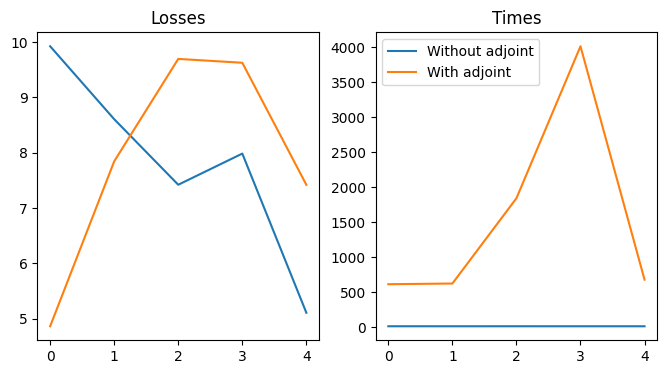

In [14]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].set_title("Losses")
axes[0].plot(losses_no_adjoint, label="Without adjoint")
axes[0].plot(losses_adjoint, label="With adjoint")
axes[1].set_title("Times")
axes[1].plot(times_no_adjoint, label="Without adjoint")
axes[1].plot(times_adjoint, label="With adjoint")
plt.legend()

## Conclusions
As expected, using the adjoint method (also known as optimise-then-discretise) is a lot slower than backpropagating through the operations of the ODE solver. The former is in fact almost 129 times slower. If we ignore the third iteration, which seems to be an outlier, the mean time is around 940 which is still 78 times slower.

In terms of performance, both are comparable. 